             X       Y          Z AA       Mass
0    23.388000 -19.139  -9.239000  M  149.20784
1    24.634001 -16.649  -6.582000  K  146.18934
2    23.024000 -14.147  -4.186000  A   89.09404
3    19.518999 -14.167  -2.949000  F  165.19184
4    20.761999 -13.862   0.649000  T  119.12034
..         ...     ...        ... ..        ...
205  -0.389000  -7.560   8.314000  V  117.14784
206  -1.093000  -4.358  10.287000  N  132.11904
207  -0.387000  -3.627  13.961000  Y  181.19124
208  -2.372000  -0.894  15.827000  Y  181.19124
209  -0.804000   1.196  18.641001  F  165.19184

[210 rows x 5 columns]
(210, 8)
        X        Y       Z AA   Avg_Mass   Avg_Neighbor_Dist  \
0  23.388  -19.139  -9.239  M  149.20784  3.8486709594726562   
1  24.634  -16.649  -6.582  K  146.18934   3.834369659423828   
2  23.024  -14.147  -4.186  A   89.09404  3.7685012817382812   
3  19.519  -14.167  -2.949  F  165.19184  3.7678961753845215   
4  20.762  -13.862   0.649  T  119.12034  3.8312950134277344   

    Ma

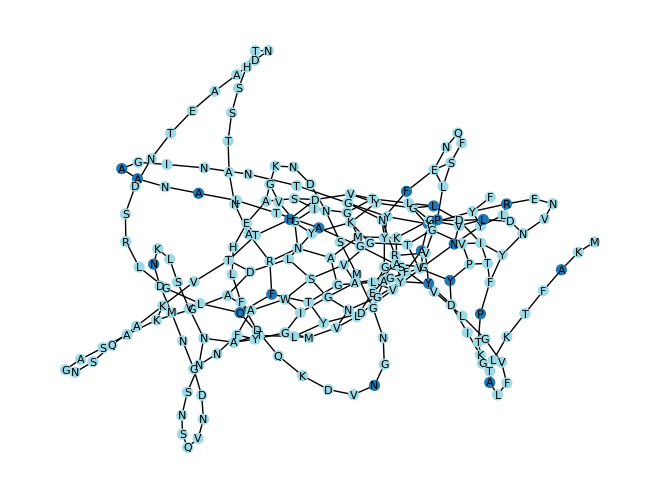

             X       Y          Z AA       Mass
0    23.388000 -19.139  -9.239000  M  149.20784
1    24.634001 -16.649  -6.582000  K  146.18934
2    23.024000 -14.147  -4.186000  A   89.09404
3    19.518999 -14.167  -2.949000  F  165.19184
4    20.761999 -13.862   0.649000  T  119.12034
..         ...     ...        ... ..        ...
205  -0.389000  -7.560   8.314000  V  117.14784
206  -1.093000  -4.358  10.287000  N  132.11904
207  -0.387000  -3.627  13.961000  Y  181.19124
208  -2.372000  -0.894  15.827000  Y  181.19124
209  -0.804000   1.196  18.641001  F  165.19184

[210 rows x 5 columns]
(210, 9)
        X        Y       Z AA   Avg_Mass   Avg_Neighbor_Dist  \
0  23.388  -19.139  -9.239  M  149.20784  3.8486709594726562   
1  24.634  -16.649  -6.582  K  146.18934   3.834369659423828   
2  23.024  -14.147  -4.186  A   89.09404  3.7685012817382812   
3  19.519  -14.167  -2.949  F  165.19184  3.7678961753845215   
4  20.762  -13.862   0.649  T  119.12034  3.8312950134277344   

    Ma

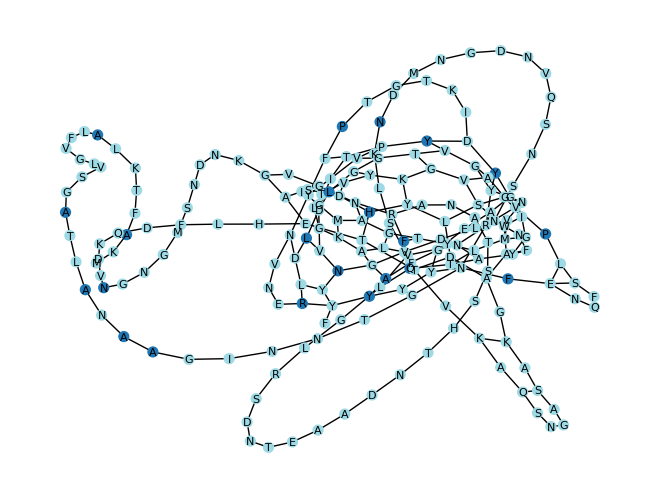

In [3]:
# Import necessary libraries
import os
import pandas as pd

from ProteinAnalyzer import ProteinAnalyzer
from GraphCreatorOneHotEncodedVariant import GraphCreatorOneHotEncodedVariant
from GraphCreator import GraphCreator

import torch
from torch_geometric.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import torch.nn as nn
from torch_geometric.nn import GCNConv, global_mean_pool
import torch.nn as nn
import Utils

import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

pdb_file = '/Users/alexchilton/Downloads/archive/train/AF-D0ZA02-F1-model_v4.pdb'
aa_info_file = 'aa_mass_letter.csv'
analyzer = ProteinAnalyzer(pdb_file, aa_info_file)
graph_creator = GraphCreator(pdb_file, aa_info_file)

# Generate the autoencoder input DataFrame
autoencoder_input_df = analyzer.prepare_autoencoder_input()
# Example usage:
# graph_creator = GraphCreator(pdb_file, aa_info_file)
autoencoder_input_df, le = graph_creator.encode_aa(autoencoder_input_df)
pd.set_option('display.max_columns', None)

print(autoencoder_input_df.shape)
print(autoencoder_input_df.head())

# Unpack the returned tuple
graph = graph_creator.create_graph(autoencoder_input_df)

# Print graph metrics
graph_creator.print_graph_metrics(graph)

# Draw the graph
graph_creator.draw_graph(graph, le)

In [4]:

def load_pdb_files(directory):
    pdb_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.pdb')]
    return pdb_files

def create_autoencoder_input_dfs(pdb_files, aa_info_file):
    autoencoder_input_dfs = []
    for pdb_file in pdb_files:
        analyzer = ProteinAnalyzer(pdb_file, aa_info_file)
        autoencoder_input_df = analyzer.prepare_autoencoder_input()
        autoencoder_input_dfs.append(autoencoder_input_df)
    return autoencoder_input_dfs


# Directory containing PDB files
pdb_directory = '/Users/alexchilton/Downloads/archive/just100'
aa_info_file = 'aa_mass_letter.csv'

# Load PDB files
pdb_files = load_pdb_files(pdb_directory)

# Create autoencoder input DataFrames
autoencoder_input_dfs = create_autoencoder_input_dfs(pdb_files, aa_info_file)


         X      Y       Z AA       Mass
0   -3.361  0.103   5.039  I  131.17464
1   -0.566 -2.557   5.206  I  131.17464
2   -1.398 -3.989   1.720  E  147.13074
3   -1.416 -0.429   0.246  K  146.18934
4    1.985  0.279   1.908  L  131.17464
5    3.484 -3.071   0.728  V  117.14784
6    2.124 -2.571  -2.836  N  132.11904
7    3.463  1.055  -2.853  T  119.12034
8    6.910 -0.168  -1.670  A   89.09404
9    6.932 -3.113  -4.147  L  131.17464
10   5.683 -0.697  -6.877  G   75.06714
11   8.570  1.760  -6.183  L  131.17464
12  11.161 -1.090  -6.155  L  131.17464
13   9.714 -2.762  -9.317  S  105.09344
14  10.170  0.130 -11.838  G   75.06714
15   8.169  3.306 -11.184  L  131.17464
         X      Y      Z AA       Mass
0   13.000 -1.172 -7.426  F  165.19184
1   10.319 -3.992 -7.708  V  117.14784
2   10.134 -4.877 -3.913  P  115.13194
3    8.848 -1.383 -2.858  L  131.17464
4    5.424 -1.893 -4.558  L  131.17464
5    5.032 -5.427 -3.097  V  117.14784
6    5.356 -3.993  0.466  S  105.09344
7    2.0

In [6]:

# Assuming autoencoder_input_dfs is already defined
autoencoder_input_dfs = Utils.Utils.convert_columns_to_float(autoencoder_input_dfs)

# Verify the conversion
print(autoencoder_input_dfs[0].dtypes)
print(autoencoder_input_dfs[0].head())

X                    float64
Y                    float64
Z                    float64
AA                    object
Avg_Mass             float64
Avg_Neighbor_Dist    float64
Max_Neighbor_Dist    float64
Neighbor_Count       float64
dtype: object
       X      Y      Z AA   Avg_Mass  Avg_Neighbor_Dist  Max_Neighbor_Dist  \
0 -3.361  0.103  5.039  I  131.17464           3.862061           3.862061   
1 -0.566 -2.557  5.206  I  131.17464           3.860735           3.862061   
2 -1.398 -3.989  1.720  E  147.13074           3.856269           3.859410   
3 -1.416 -0.429  0.246  K  146.18934           3.852071           3.853129   
4  1.985  0.279  1.908  L  131.17464           3.853064           3.855114   

   Neighbor_Count  
0             1.0  
1             2.0  
2             2.0  
3             2.0  
4             2.0  


In [7]:
print(type(autoencoder_input_dfs))
print(autoencoder_input_dfs[0].head())
print(len(autoencoder_input_dfs))
print(autoencoder_input_dfs[0].dtypes)

<class 'list'>
       X      Y      Z AA   Avg_Mass  Avg_Neighbor_Dist  Max_Neighbor_Dist  \
0 -3.361  0.103  5.039  I  131.17464           3.862061           3.862061   
1 -0.566 -2.557  5.206  I  131.17464           3.860735           3.862061   
2 -1.398 -3.989  1.720  E  147.13074           3.856269           3.859410   
3 -1.416 -0.429  0.246  K  146.18934           3.852071           3.853129   
4  1.985  0.279  1.908  L  131.17464           3.853064           3.855114   

   Neighbor_Count  
0             1.0  
1             2.0  
2             2.0  
3             2.0  
4             2.0  
100
X                    float64
Y                    float64
Z                    float64
AA                    object
Avg_Mass             float64
Avg_Neighbor_Dist    float64
Max_Neighbor_Dist    float64
Neighbor_Count       float64
dtype: object


In [40]:
#import Utils

# Assuming autoencoder_input_dfs is already defined
normalized_autoencoder_input_dfs = Utils.Utils.normalize_dataframes(autoencoder_input_dfs)

# Verify the normalization
print(normalized_autoencoder_input_dfs[0].head())

          X         Y         Z AA  Avg_Mass  Avg_Neighbor_Dist  \
0 -0.467622 -0.136649  0.671505  I  0.215695           0.059973   
1 -0.115086 -0.701362  0.691286  I  0.215695           0.047084   
2 -0.220027 -1.005372  0.278383  E  0.821612           0.003653   
3 -0.222297 -0.249591  0.103794  K  0.785863          -0.037172   
4  0.206675 -0.099284  0.300651  L  0.215695          -0.027520   

   Max_Neighbor_Dist  Neighbor_Count  
0          -0.185168       -2.236211  
1          -0.185168        0.092800  
2          -0.195708        0.092800  
3          -0.220681        0.092800  
4          -0.212789        0.092800  


In [8]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist

# Extract only the X, Y, and Z columns from each DataFrame
xyz_columns = ['X', 'Y', 'Z']
all_distances = []

for df in normalized_autoencoder_input_dfs:
    xyz_df = df[xyz_columns]
    distances = pdist(xyz_df.values)  # Calculate pairwise distances
    all_distances.extend(distances)

# Convert the list of distances to a numpy array
all_distances = np.array(all_distances)

# Compute the mean and standard deviation of the distances
mean_distance = np.mean(all_distances)
std_distance = np.std(all_distances)
print ('mean distance',mean_distance)
print ('std_distance',std_distance)
# Create the original_data_stats dictionary
original_data_stats = {'mean': mean_distance, 'std': std_distance}

# Original distance threshold
original_distance_threshold = 5.0

# Adjust the distance threshold
adjusted_distance_threshold = original_distance_threshold / std_distance

print(f"Adjusted distance threshold: {adjusted_distance_threshold}")

NameError: name 'normalized_autoencoder_input_dfs' is not defined

In [10]:
from Utils import Utils

# Assuming autoencoder_input_dfs is already defined
onehot_encoder = Utils.create_onehot_encoder(autoencoder_input_dfs)

encoded_autoencoder_input_dfs = [Utils.encode_values(df, onehot_encoder) for df in autoencoder_input_dfs]
#decoded_autoencoder_input_dfs = [decode_values(df) for df in new_autoencoder_input_dfs]

# Print the first few rows of the first encoded and decoded DataFrame
print(encoded_autoencoder_input_dfs[0].head())
#print(decoded_autoencoder_input_dfs[0].head())

       X      Y      Z   Avg_Mass  Avg_Neighbor_Dist  Max_Neighbor_Dist  \
0 -3.361  0.103  5.039  131.17464           3.862061           3.862061   
1 -0.566 -2.557  5.206  131.17464           3.860735           3.862061   
2 -1.398 -3.989  1.720  147.13074           3.856269           3.859410   
3 -1.416 -0.429  0.246  146.18934           3.852071           3.853129   
4  1.985  0.279  1.908  131.17464           3.853064           3.855114   

   Neighbor_Count  AA_A  AA_C  AA_D  AA_E  AA_F  AA_G  AA_H  AA_I  AA_K  AA_L  \
0             1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   
1             2.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   
2             2.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   
3             2.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
4             2.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   

   AA_M  AA_N  AA_P  AA_Q  AA_R  AA_S  AA_T  AA_V  AA_W  AA_Y 

In [42]:
#decoded_autoencoder_input_dfs = [Utils.decode_values(df, onehot_encoder) for df in new_autoencoder_input_dfs]
#print(decoded_autoencoder_input_dfs[0].head())

In [11]:
from GraphCreatorOneHotEncodedVariant import GraphCreatorOneHotEncodedVariant
graph_creator = GraphCreatorOneHotEncodedVariant()
graphs = []
for df in encoded_autoencoder_input_dfs:
    graph = graph_creator.create_graph(df)
    graphs.append(graph)

#### ONLY NORMALISE AFTER DOING THE EDGES!!!

In [12]:
import networkx as nx
def draw_graph( graph, onehot_encoder):
    g = nx.Graph()
    edge_index = graph.edge_index.numpy()
    for i in range(edge_index.shape[1]):
        g.add_edge(edge_index[0, i], edge_index[1, i])

    pos = nx.spring_layout(g)

    # Adjust the column names to match the number of features in graph.x
    num_features = graph.x.size(1)
    columns = ['X', 'Y', 'Z', 'Avg_Mass', 'Avg_Neighbor_Dist', 'Max_Neighbor_Dist', 'Neighbor_Count', 'AA_A', 'AA_C', 'AA_D', 'AA_E', 'AA_F', 'AA_G', 'AA_H', 'AA_I', 'AA_K', 'AA_L', 'AA_M', 'AA_N', 'AA_P', 'AA_Q', 'AA_R', 'AA_S', 'AA_T', 'AA_V', 'AA_W', 'AA_Y']

    # Decode the one-hot encoded values
    encoded_df = pd.DataFrame(graph.x.numpy(), columns=columns)

    # Verify the column names in the DataFrame
    #print("Columns in the DataFrame:")
    #print(encoded_df.columns)
    
    # Ensure the OneHotEncoder is correctly applied
    
    #encoded_columns = onehot_encoder.get_feature_names_out(['AA'])
    
    #print("Expected one-hot encoded columns:")
    #print(encoded_columns)
    
    # Check if the expected columns are in the DataFrame
    #missing_columns = [col for col in encoded_columns if col not in encoded_df.columns]
    #if missing_columns:
    #    print("Missing columns in the DataFrame:")
    #    print(missing_columns)
    #else:
    #    print("All expected columns are present in the DataFrame.")
    
    decoded_df = decode_values(encoded_df, onehot_encoder, original_column_name='AA')

    # Use the decoded values for node names and colors
    node_labels = {i: decoded_df['AA'][i] for i in range(graph.num_nodes)}
    unique_labels = decoded_df['AA'].unique()
    color_map = {label: plt.cm.tab20(i % 20) for i, label in enumerate(unique_labels)}
    node_colors = [color_map[decoded_df['AA'][i]] for i in range(graph.num_nodes)]

    nx.draw(g, pos, with_labels=True, labels=node_labels, node_color=node_colors, node_size=200, font_size=8)
    plt.show()

# Update the decode_values function
def decode_values(encoded_df, onehot_encoder, original_column_name='AA'):
    encoded_columns = onehot_encoder.get_feature_names_out([original_column_name])
    encoded_values = encoded_df[encoded_columns].values
    decoded_values = onehot_encoder.inverse_transform(encoded_values)
    decoded_df = encoded_df.drop(columns=encoded_columns)
    decoded_df[original_column_name] = decoded_values.flatten()
    return decoded_df

Graph 1: 16 nodes, 32 edges


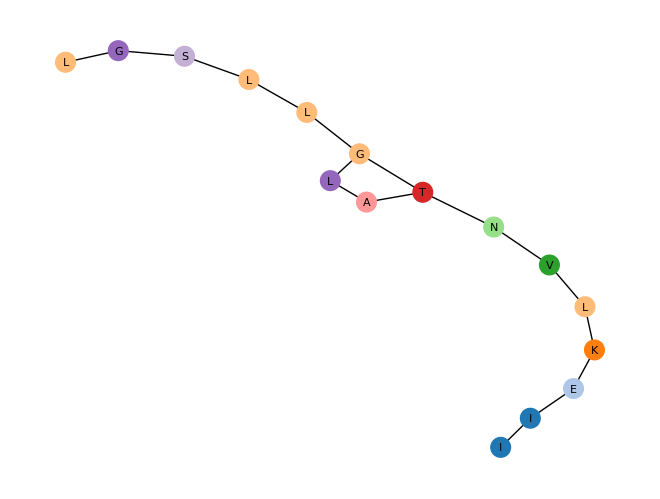

Graph 2: 17 nodes, 34 edges


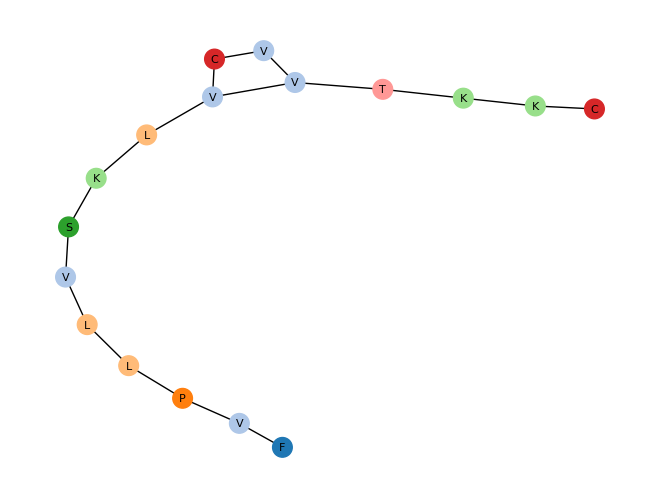

Graph 3: 17 nodes, 32 edges


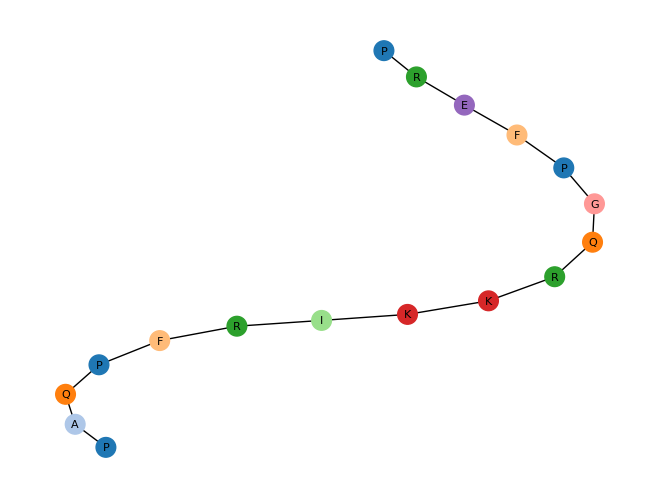

Graph 4: 21 nodes, 42 edges


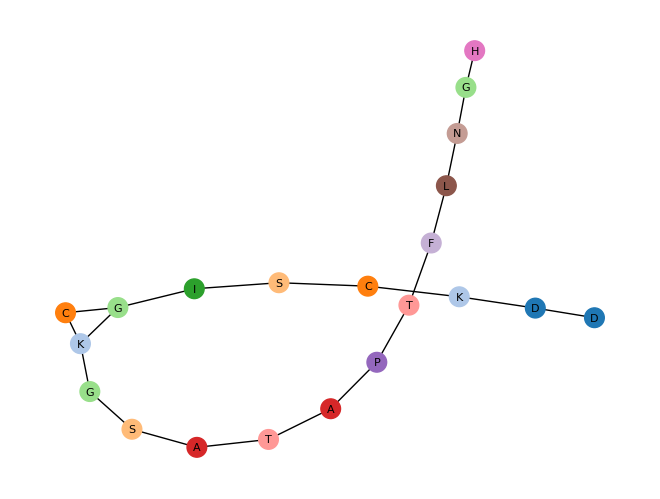

Graph 5: 17 nodes, 34 edges


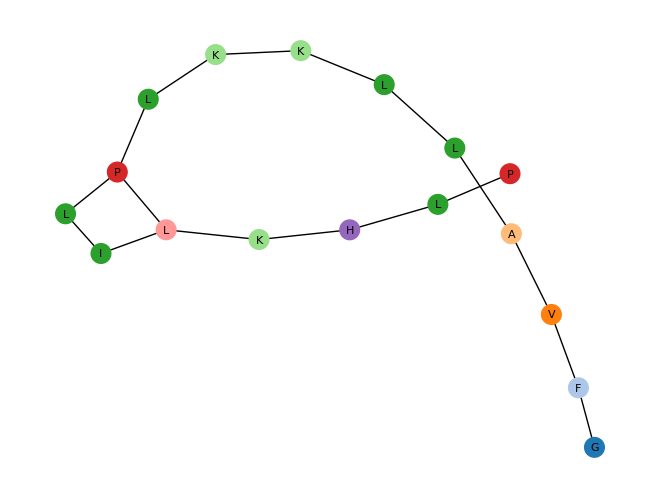

Graph 6: 20 nodes, 38 edges


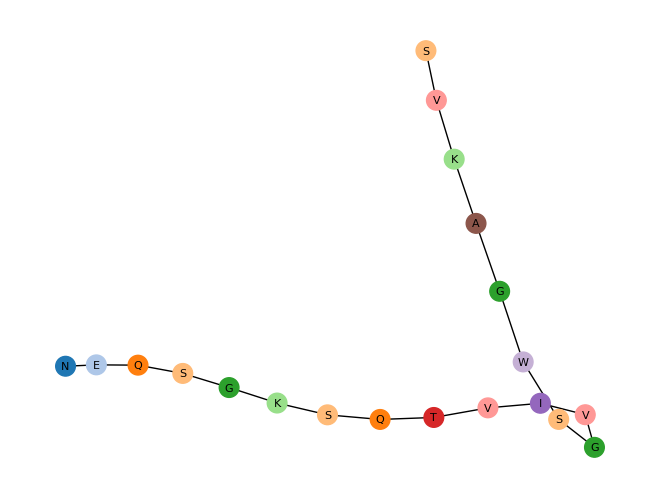

Graph 7: 16 nodes, 32 edges


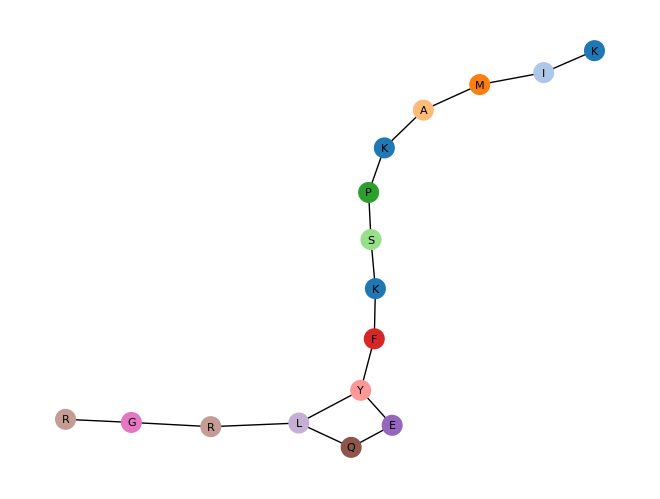

Graph 8: 17 nodes, 32 edges


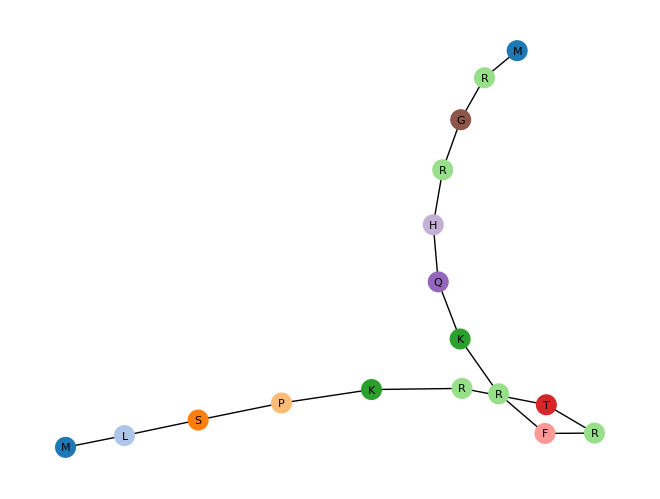

Graph 9: 17 nodes, 34 edges


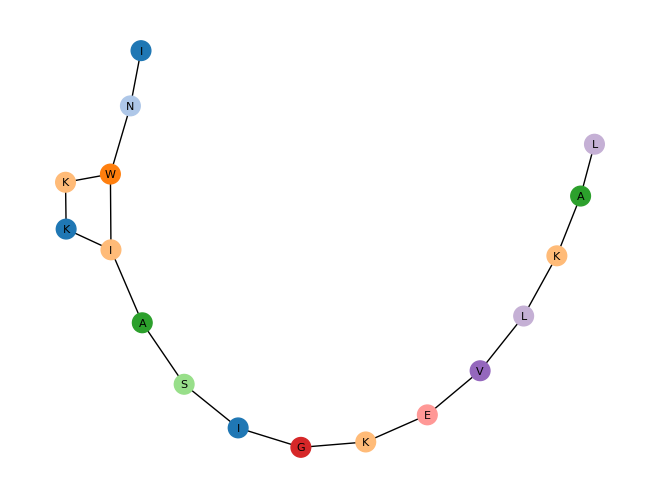

Graph 10: 16 nodes, 32 edges


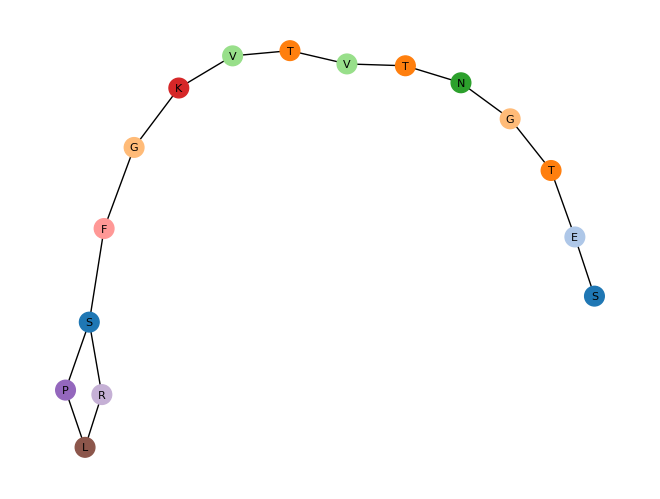

In [14]:
# Now `graphs` contains all the graphs created from the encoded DataFrames
for i, graph in enumerate(graphs[:10]):
    print(f"Graph {i + 1}: {graph.num_nodes} nodes, {graph.num_edges} edges")
    graph_creator.draw_graph(graph, onehot_encoder)

In [15]:
import torch
from torch_geometric.data import Data

### move to the graph creator class....

def pad_graphs( graphs, max_nodes):
    padded_graphs = []
    for graph in graphs:
        num_nodes = graph.x.size(0)
        if num_nodes < max_nodes:
            # Pad node features
            padding = torch.zeros((max_nodes - num_nodes, graph.x.size(1)))
            padded_x = torch.cat([graph.x, padding], dim=0)

            # Pad edge indices
            padded_edge_index = graph.edge_index

            # Create padded graph
            padded_graph = Data(x=padded_x, edge_index=padded_edge_index)
            padded_graphs.append(padded_graph)
        else:
            padded_graphs.append(graph)
    return padded_graphs

# Determine the maximum number of nodes in the dataset
max_num_nodes = max(graph.num_nodes for graph in graphs)
# Pad all graphs to have the same number of nodes
padded_graphs = graph_creator.pad_graphs(graphs, max_num_nodes)

# Now `padded_graphs` contains all the graphs with the same number of nodes and padded `AA_encoded` column

In [16]:
# Print each node's features for the first padded graph
first_padded_graph = padded_graphs[0]
for i, node_features in enumerate(first_padded_graph.x):
    print(f"Node {i + 1}: {node_features}")

Node 1: tensor([-3.3610e+00,  1.0300e-01,  5.0390e+00,  1.3117e+02,  3.8621e+00,
         3.8621e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00])
Node 2: tensor([ -0.5660,  -2.5570,   5.2060, 131.1746,   3.8607,   3.8621,   2.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          1.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000])
Node 3: tensor([ -1.3980,  -3.9890,   1.7200, 147.1307,   3.8563,   3.8594,   2.0000,
          0.0000,   0.0000,   0.0000,   1.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,  

In [58]:
for i, graph in enumerate(padded_graphs[:10]):
    print(f"Graph {i + 1}: {graph.num_nodes} nodes, {graph.num_edges} edges")
    #graph_creator.draw_graph(graph, onehot_encoder)

Graph 1: 21 nodes, 32 edges
Graph 2: 21 nodes, 34 edges
Graph 3: 21 nodes, 32 edges
Graph 4: 21 nodes, 42 edges
Graph 5: 21 nodes, 34 edges
Graph 6: 21 nodes, 38 edges
Graph 7: 21 nodes, 32 edges
Graph 8: 21 nodes, 32 edges
Graph 9: 21 nodes, 34 edges
Graph 10: 21 nodes, 32 edges


In [19]:
import torch
import torch.optim as optim
import torch.nn as nn

class GraphVAE(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, num_nodes):
        super(GraphVAE, self).__init__()
        self.num_nodes = num_nodes
        self.in_channels = in_channels
        self.encoder = nn.Sequential(
            GCNConv(in_channels, hidden_channels),
            nn.ReLU(),
            GCNConv(hidden_channels, hidden_channels),
            nn.ReLU()
        )
        self.fc_mu = nn.Linear(hidden_channels, out_channels)
        self.fc_logvar = nn.Linear(hidden_channels, out_channels)
        self.decoder = nn.Sequential(
            nn.Linear(out_channels, hidden_channels),
            nn.ReLU(),
            nn.Linear(hidden_channels, in_channels * num_nodes)  # Output size matches the fixed number of nodes
        )

    def encode(self, x, edge_index, batch):
        x = self.encoder[0](x, edge_index)
        x = self.encoder[1](x)
        x = self.encoder[2](x, edge_index)
        x = self.encoder[3](x)
        x = global_mean_pool(x, batch)  # Pooling to get graph-level embedding
        return self.fc_mu(x), self.fc_logvar(x)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std).to(mu.device)  # Ensure `eps` is on the same device
        return mu + eps * std

    def decode(self, z):
        recon = self.decoder(z)
        recon = recon.view(-1, self.num_nodes, self.in_channels)  # Reshape to (batch_size, num_nodes, in_channels)
        return recon

    def forward(self, x, edge_index, batch):
        mu, logvar = self.encode(x, edge_index, batch)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar



In [59]:
for i, graph in enumerate(padded_graphs[:10]):
    print(f"Graph {i + 1}: {graph.num_nodes} nodes, {graph.num_edges} edges, {graph.num_node_features} features")
    #graph_creator.draw_graph(graph, onehot_encoder)

Graph 1: 21 nodes, 32 edges, 27 features
Graph 2: 21 nodes, 34 edges, 27 features
Graph 3: 21 nodes, 32 edges, 27 features
Graph 4: 21 nodes, 42 edges, 27 features
Graph 5: 21 nodes, 34 edges, 27 features
Graph 6: 21 nodes, 38 edges, 27 features
Graph 7: 21 nodes, 32 edges, 27 features
Graph 8: 21 nodes, 32 edges, 27 features
Graph 9: 21 nodes, 34 edges, 27 features
Graph 10: 21 nodes, 32 edges, 27 features


In [20]:
# Print the number of graphs in the padded_graphs list
print(f"Number of graphs in padded_graphs: {len(padded_graphs)}")

Number of graphs in padded_graphs: 100


In [21]:
import torch
import torch.optim as optim
import torch.nn as nn
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Assume `padded_graphs` is your list of padded graphs
dataset = padded_graphs

# Create a DataLoader for batching the graphs
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define model parameters
in_channels = dataset[0].num_node_features
hidden_channels = 64
out_channels = 32
num_nodes = max(graph.num_nodes for graph in dataset)

# Initialize the model
model = GraphVAE(in_channels, hidden_channels, out_channels, num_nodes).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_function = nn.MSELoss()
beta = 1.0  # KL divergence weighting factor

/opt/anaconda3/envs/untitled/lib/python3.8/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [22]:
num_nodes


21

In [23]:
num_epochs = 200
model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for data in dataloader:
        data = data.to(device)
        optimizer.zero_grad()

        # Forward pass
        recon, mu, logvar = model(data.x, data.edge_index, data.batch)

        # Reconstruction loss
        loss_recon = loss_function(recon.view(-1, data.num_nodes, data.num_node_features), data.x.view(-1, data.num_nodes, data.num_node_features))
        # KL divergence loss
        kld = -0.5 * torch.mean(1 + logvar - mu.pow(2) - logvar.exp())
        loss = loss_recon + beta * kld

        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch + 1}, Loss: {total_loss / len(dataloader)}")

Epoch 1, Loss: 654.3479614257812
Epoch 2, Loss: 546.5760955810547
Epoch 3, Loss: 522.0190887451172
Epoch 4, Loss: 514.9242935180664
Epoch 5, Loss: 510.46632385253906
Epoch 6, Loss: 511.29241943359375
Epoch 7, Loss: 495.8675308227539
Epoch 8, Loss: 471.2671585083008
Epoch 9, Loss: 436.2366943359375
Epoch 10, Loss: 401.07408142089844
Epoch 11, Loss: 352.48169708251953
Epoch 12, Loss: 293.30684661865234
Epoch 13, Loss: 247.22911071777344
Epoch 14, Loss: 211.32689666748047
Epoch 15, Loss: 189.0611343383789
Epoch 16, Loss: 162.67589569091797
Epoch 17, Loss: 140.65099334716797
Epoch 18, Loss: 129.752290725708
Epoch 19, Loss: 123.25040054321289
Epoch 20, Loss: 113.79048919677734
Epoch 21, Loss: 105.60741996765137
Epoch 22, Loss: 100.79312324523926
Epoch 23, Loss: 96.06343460083008
Epoch 24, Loss: 90.2716007232666
Epoch 25, Loss: 86.92755508422852
Epoch 26, Loss: 91.74814224243164
Epoch 27, Loss: 87.41881561279297
Epoch 28, Loss: 81.86478614807129
Epoch 29, Loss: 85.16586112976074
Epoch 30, Lo

Epoch 1, Loss: 31.53244686126709
Epoch 2, Loss: 32.12883949279785
Epoch 3, Loss: 31.605153560638428
Epoch 4, Loss: 33.148056983947754
Epoch 5, Loss: 31.401804447174072
Epoch 6, Loss: 33.02301549911499
Epoch 7, Loss: 32.55898094177246
Epoch 8, Loss: 32.71622848510742
Epoch 9, Loss: 29.839716911315918
Epoch 10, Loss: 33.48515796661377
Epoch 11, Loss: 30.00606679916382
Epoch 12, Loss: 33.83135175704956
Epoch 13, Loss: 31.700401782989502
Epoch 14, Loss: 28.573881149291992
Epoch 15, Loss: 33.62595510482788
Epoch 16, Loss: 30.730291843414307
Epoch 17, Loss: 31.779836177825928
Epoch 18, Loss: 30.713129997253418
Epoch 19, Loss: 31.57397222518921
Epoch 20, Loss: 32.8738489151001
Epoch 21, Loss: 30.271728992462158
Epoch 22, Loss: 33.50069618225098
Epoch 23, Loss: 29.83576536178589
Epoch 24, Loss: 31.158280849456787
Epoch 25, Loss: 29.970598220825195
Epoch 26, Loss: 30.414218425750732
Epoch 27, Loss: 34.836801052093506
Epoch 28, Loss: 31.47261953353882
Epoch 29, Loss: 31.885087490081787
Epoch 30,

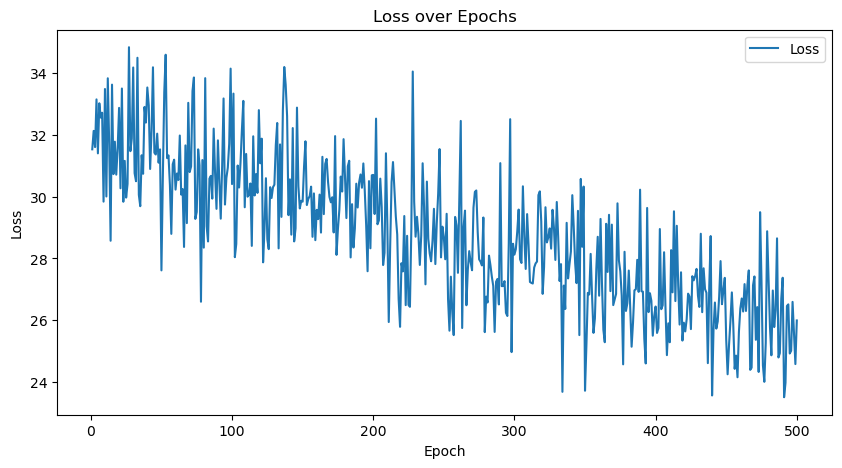

In [25]:
import matplotlib.pyplot as plt
# List to store loss values
loss_values = []

num_epochs = 500
model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for data in dataloader:
        data = data.to(device)
        optimizer.zero_grad()

        # Forward pass
        recon, mu, logvar = model(data.x, data.edge_index, data.batch)

        # Reconstruction loss
        loss_recon = loss_function(recon.view(-1, data.num_nodes, data.num_node_features), data.x.view(-1, data.num_nodes, data.num_node_features))
        # KL divergence loss
        kld = -0.5 * torch.mean(1 + logvar - mu.pow(2) - logvar.exp())
        loss = loss_recon + beta * kld

        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    loss_values.append(avg_loss)
    print(f"Epoch {epoch + 1}, Loss: {avg_loss}")

# Plot the loss values
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), loss_values, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

In [27]:
# Check the columns and data types of the first DataFrame in the list
print("Columns and data types in the first DataFrame:")
print(encoded_autoencoder_input_dfs[0].dtypes)

print(encoded_autoencoder_input_dfs[0].head())# Identify non-numeric columns
non_numeric_columns = encoded_autoencoder_input_dfs[0].select_dtypes(exclude=['number']).columns
print("\nNon-numeric columns in the first DataFrame:")
print(non_numeric_columns)

Columns and data types in the first DataFrame:
X                    float64
Y                    float64
Z                    float64
Avg_Mass             float64
Avg_Neighbor_Dist    float64
Max_Neighbor_Dist    float64
Neighbor_Count       float64
AA_A                 float64
AA_C                 float64
AA_D                 float64
AA_E                 float64
AA_F                 float64
AA_G                 float64
AA_H                 float64
AA_I                 float64
AA_K                 float64
AA_L                 float64
AA_M                 float64
AA_N                 float64
AA_P                 float64
AA_Q                 float64
AA_R                 float64
AA_S                 float64
AA_T                 float64
AA_V                 float64
AA_W                 float64
AA_Y                 float64
dtype: object
       X      Y      Z   Avg_Mass  Avg_Neighbor_Dist  Max_Neighbor_Dist  \
0 -3.361  0.103  5.039  131.17464           3.862061           3.862061   
1 -0.5

In [28]:
import pandas as pd

# Concatenate all DataFrames in the list
concatenated_df = pd.concat(encoded_autoencoder_input_dfs, ignore_index=True)

# Compute the mean and standard deviation
mean_values = concatenated_df.mean().values
std_values = concatenated_df.std().values

# Create the original_data_stats dictionary
original_data_stats = {'mean': mean_values, 'std': std_values}

print(original_data_stats)

{'mean': array([ 3.46429441e-01,  7.46664638e-01, -6.30302158e-01,  1.25494573e+02,
        3.85589373e+00,  3.90863279e+00,  1.96015495e+00,  6.47482014e-02,
        5.92141671e-02,  2.60099613e-02,  3.15439956e-02,  3.26508024e-02,
        8.35639181e-02,  1.66021029e-02,  6.80686220e-02,  6.69618152e-02,
        1.08467072e-01,  2.54565578e-02,  3.26508024e-02,  8.68843387e-02,
        3.65246265e-02,  4.86995019e-02,  8.19037078e-02,  4.42722745e-02,
        6.64084117e-02,  6.64084117e-03,  1.27282789e-02]), 'std': array([ 7.93045922,  4.71166259,  8.44501673, 26.34109178,  0.10285975,
        0.251582  ,  0.42948574,  0.24614915,  0.23609044,  0.15920889,
        0.17483102,  0.17777012,  0.27680931,  0.12781046,  0.25193334,
        0.25002505,  0.31105548,  0.15755081,  0.17777012,  0.28174346,
        0.18764345,  0.21529866,  0.27429387,  0.20575633,  0.24906357,
        0.0812428 ,  0.11213041])}


In [33]:
import torch
from torch_geometric.data import Data

def generate_new_graphs(model, num_graphs, latent_dim, num_nodes, num_node_features, original_data_stats, distance_threshold=5.0):
    model.eval()  # Set the model to evaluation mode
    new_graphs = []

    with torch.no_grad():
        for _ in range(num_graphs):
            # Sample a random latent vector from a standard normal distribution
            z = torch.randn(1, latent_dim).to(device)

            # Decode the latent vector to generate a new graph
            recon = model.decode(z)

            # Convert the reconstructed features back to a PyTorch Geometric graph format
            x = recon.view(num_nodes, num_node_features)  # Ensure the correct shape
            # Scale the `x`, `y`, `z` coordinates back to the original range
            x[:, 0:3] = x[:, 0:3] * original_data_stats['std'][0:3] + original_data_stats['mean'][0:3]

            # Generate a realistic edge_index tensor based on the distance threshold
            edge_index = []
            coordinates = x[:, 0:3].cpu().numpy()
            for i in range(num_nodes):
                for j in range(i + 1, num_nodes):
                    dist = np.linalg.norm(coordinates[i] - coordinates[j])
                    if dist <= distance_threshold:
                        edge_index.append([i, j])
                        edge_index.append([j, i])

            edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()

            new_graph = Data(x=x, edge_index=edge_index)
            new_graphs.append(new_graph)

    return new_graphs

# Generate 10 new protein graphs with specified dimensions
num_new_graphs = 10
latent_dim = out_channels  # Dimension of the latent space
num_nodes = 21  # Number of nodes
num_node_features = 27  # Number of node features
new_graphs = generate_new_graphs(model, num_new_graphs, latent_dim, num_nodes, num_node_features, original_data_stats)

# Print the number of nodes and edges in each generated graph
for i, graph in enumerate(new_graphs):
    print(f"Graph {i + 1}: {graph.num_nodes} nodes, {graph.num_edges} edges")

Graph 1: 21 nodes, 54 edges
Graph 2: 21 nodes, 58 edges
Graph 3: 21 nodes, 24 edges
Graph 4: 21 nodes, 76 edges
Graph 5: 21 nodes, 12 edges
Graph 6: 21 nodes, 10 edges
Graph 7: 21 nodes, 40 edges
Graph 8: 21 nodes, 28 edges
Graph 9: 21 nodes, 24 edges
Graph 10: 21 nodes, 6 edges


In [34]:
# Print each node's features for the first graph
first_graph = new_graphs[0]
for i, node_features in enumerate(first_graph.x):
    print(f"Node {i + 1}: {node_features}")

Node 1: tensor([-9.5632e+00, -2.1687e+00,  4.9068e+00,  1.3699e+00,  3.7047e-01,
         5.2574e-01,  2.8550e-01, -5.1387e-02, -2.7031e-01,  2.3165e-01,
         2.0489e-01,  3.3186e-02,  7.9709e-03, -2.4287e-01,  2.7707e-01,
        -9.6350e-02, -9.4805e-02,  1.9817e-02, -1.3028e-01, -2.6804e-01,
        -3.5985e-01,  1.7936e-01,  1.2280e-02,  4.9600e-01, -3.1103e-03,
        -6.5248e-02, -2.2220e-01])
Node 2: tensor([-7.1356e+00, -2.2906e+00,  1.5083e-01,  6.6799e+00,  2.1421e-01,
         6.5664e-01,  3.3869e-01,  3.4095e-01,  1.6535e-01, -1.8169e-01,
         7.5719e-02,  2.1637e-01,  2.0698e-01,  2.1304e-01,  5.2494e-03,
        -2.0214e-01, -1.3151e-01, -6.8260e-03, -4.5125e-01, -1.8253e-01,
        -3.1189e-01,  5.9650e-02, -3.1563e-01,  1.4331e-01,  2.5264e-01,
         3.8862e-01,  4.1571e-02])
Node 3: tensor([-5.8231, -2.1196, -2.4621,  6.8310,  0.2159,  0.1072,  0.0232,  0.1235,
        -0.0971, -0.3389,  0.2561, -0.1219,  0.0284,  0.1019, -0.2388,  0.2496,
         0.2204,

In [39]:
import torch

def convert_graphs_to_one_hot(graphs, prefix='AA_'):
    for graph in graphs:
        # Identify the columns that start with the given prefix
        one_hot_columns = [i for i, col in enumerate(graph.x[0]) if i >= 7 and i <= 26]  # Assuming AA_ columns are from index 7 to 26

        # Apply argmax to each row to find the index of the maximum value
        max_indices = torch.argmax(graph.x[:, one_hot_columns], dim=1)

        # Create a new tensor with zeros
        one_hot_encoded = torch.zeros_like(graph.x[:, one_hot_columns])

        # Set the maximum index positions to 1
        one_hot_encoded[torch.arange(graph.x.size(0)), max_indices] = 1

        # Replace the original columns with the new one-hot encoded values
        graph.x[:, one_hot_columns] = one_hot_encoded

    return graphs

# Convert the `AA_` columns in the generated protein graphs to one-hot encoded format
new_graphs = convert_graphs_to_one_hot(new_graphs)

In [40]:
first_graph = new_graphs[0]
for i, node_features in enumerate(first_graph.x):
    print(f"Node {i + 1}: {node_features}")

Node 1: tensor([-9.5632, -2.1687,  4.9068,  1.3699,  0.3705,  0.5257,  0.2855,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000,
         0.0000,  0.0000,  0.0000])
Node 2: tensor([-7.1356, -2.2906,  0.1508,  6.6799,  0.2142,  0.6566,  0.3387,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  1.0000,  0.0000])
Node 3: tensor([-5.8231, -2.1196, -2.4621,  6.8310,  0.2159,  0.1072,  0.0232,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         1.0000,  0.0000,  0.0000])
Node 4: tensor([-5.3335, -2.7693,  6.1983,  4.4982,  0.5475,  0.2528,  0.0916,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [51]:
import networkx as nx
def draw_graph2( graph, onehot_encoder):
    g = nx.Graph()
    edge_index = graph.edge_index.numpy()
    for i in range(edge_index.shape[1]):
        g.add_edge(edge_index[0, i], edge_index[1, i])

    pos = nx.spring_layout(g)

    # Adjust the column names to match the number of features in graph.x
    num_features = graph.x.size(1)
    columns = ['X', 'Y', 'Z', 'Avg_Mass', 'Avg_Neighbor_Dist', 'Max_Neighbor_Dist', 'Neighbor_Count', 'AA_A', 'AA_C', 'AA_D', 'AA_E', 'AA_F', 'AA_G', 'AA_H', 'AA_I', 'AA_K', 'AA_L', 'AA_M', 'AA_N', 'AA_P', 'AA_Q', 'AA_R', 'AA_S', 'AA_T', 'AA_V', 'AA_W', 'AA_Y']

    # Decode the one-hot encoded values
    encoded_df = pd.DataFrame(graph.x.numpy(), columns=columns)

    # Verify the column names in the DataFrame
    #print("Columns in the DataFrame:")
    #print(encoded_df.columns)

    # Ensure the OneHotEncoder is correctly applied

    #encoded_columns = onehot_encoder.get_feature_names_out(['AA'])

    #print("Expected one-hot encoded columns:")
    #print(encoded_columns)

    # Check if the expected columns are in the DataFrame
    #missing_columns = [col for col in encoded_columns if col not in encoded_df.columns]
    #if missing_columns:
    #    print("Missing columns in the DataFrame:")
    #    print(missing_columns)
    #else:
    #    print("All expected columns are present in the DataFrame.")

    decoded_df = decode_values(encoded_df, onehot_encoder, original_column_name='AA')


    # Check for any improperly decoded values and set them to 'C'
    if decoded_df['AA'].isnull().any():
        print("Not properly decoded")
        decoded_df['AA'].fillna('C', inplace=True)
    # Use the decoded values for node names and colors
    node_labels = {i: decoded_df['AA'][i] for i in range(graph.num_nodes)}

    # Print out all node labels
    print("Node Labels:")
    for node, label in node_labels.items():
        print(f"Node {node}: {label}")
    
    
    unique_labels = decoded_df['AA'].unique()
    color_map = {label: plt.cm.tab20(i % 20) for i, label in enumerate(unique_labels)}
    node_colors = [color_map[decoded_df['AA'][i]] for i in range(graph.num_nodes)]

    nx.draw(g, pos,with_labels=True, labels=node_labels,  node_size=200, font_size=8)
    plt.show()

# Update the decode_values function
def decode_values(encoded_df, onehot_encoder, original_column_name='AA'):
    encoded_columns = onehot_encoder.get_feature_names_out([original_column_name])
    encoded_values = encoded_df[encoded_columns].values
    decoded_values = onehot_encoder.inverse_transform(encoded_values)
    decoded_df = encoded_df.drop(columns=encoded_columns)
    decoded_df[original_column_name] = decoded_values.flatten()
    return decoded_df

In [56]:
for i, graph in enumerate(new_graphs):
    graph_creator.print_graph_metrics(graph)
    



Number of nodes: 21
Number of edges: 54
Node features shape: torch.Size([21, 27])
Number of nodes: 21
Number of edges: 58
Node features shape: torch.Size([21, 27])
Number of nodes: 21
Number of edges: 24
Node features shape: torch.Size([21, 27])
Number of nodes: 21
Number of edges: 76
Node features shape: torch.Size([21, 27])
Number of nodes: 21
Number of edges: 12
Node features shape: torch.Size([21, 27])
Number of nodes: 21
Number of edges: 10
Node features shape: torch.Size([21, 27])
Number of nodes: 21
Number of edges: 40
Node features shape: torch.Size([21, 27])
Number of nodes: 21
Number of edges: 28
Node features shape: torch.Size([21, 27])
Number of nodes: 21
Number of edges: 24
Node features shape: torch.Size([21, 27])
Number of nodes: 21
Number of edges: 6
Node features shape: torch.Size([21, 27])


In [53]:
import networkx as nx
import torch
from torch_geometric.utils import to_networkx, from_networkx

def prune_small_subgraphs(graph):
    # Convert the PyTorch Geometric graph to a NetworkX graph
    g = to_networkx(graph, to_undirected=True)

    # Find all connected components
    connected_components = list(nx.connected_components(g))

    # Find the largest connected component
    largest_component = max(connected_components, key=len)

    # Create a subgraph containing only the largest connected component
    largest_subgraph = g.subgraph(largest_component).copy()

    # Convert the NetworkX subgraph back to a PyTorch Geometric graph
    pruned_graph = from_networkx(largest_subgraph)

    # Ensure the node features are preserved
    pruned_graph.x = graph.x[list(largest_component)]

    return pruned_graph

# Example usage:
pruned_graphs = [prune_small_subgraphs(graph) for graph in new_graphs]

# Print the number of nodes and edges in each pruned graph
for i, graph in enumerate(pruned_graphs):
    print(f"Pruned Graph {i + 1}: {graph.num_nodes} nodes, {graph.num_edges} edges")

Pruned Graph 1: 17 nodes, 52 edges
Pruned Graph 2: 9 nodes, 46 edges
Pruned Graph 3: 6 nodes, 12 edges
Pruned Graph 4: 15 nodes, 66 edges
Pruned Graph 5: 3 nodes, 6 edges
Pruned Graph 6: 3 nodes, 4 edges
Pruned Graph 7: 12 nodes, 32 edges
Pruned Graph 8: 5 nodes, 14 edges
Pruned Graph 9: 4 nodes, 8 edges
Pruned Graph 10: 2 nodes, 2 edges


Number of nodes: 17
Number of edges: 52
Node features shape: torch.Size([17, 27])


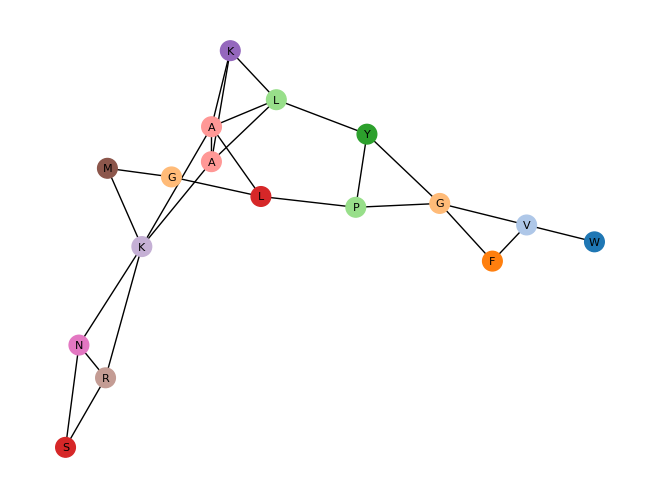

Number of nodes: 9
Number of edges: 46
Node features shape: torch.Size([9, 27])


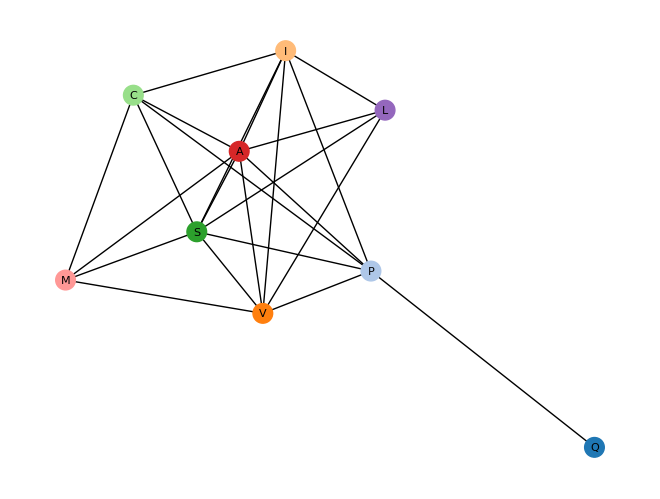

Number of nodes: 6
Number of edges: 12
Node features shape: torch.Size([6, 27])


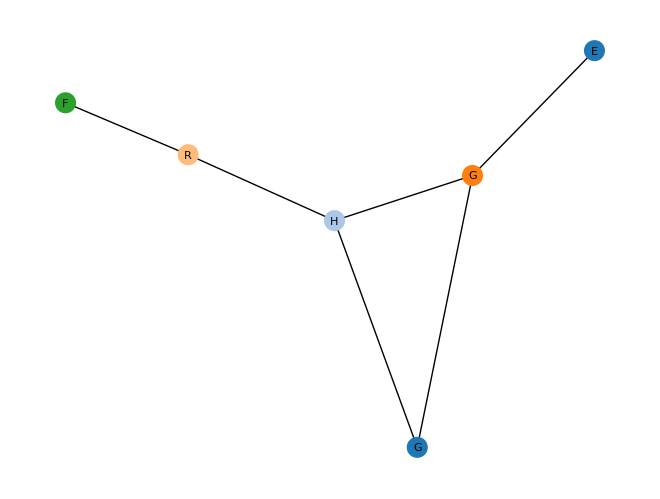

Number of nodes: 15
Number of edges: 66
Node features shape: torch.Size([15, 27])


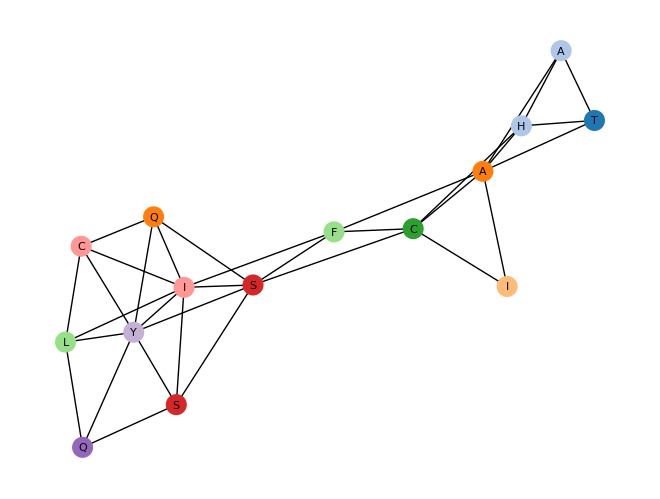

Number of nodes: 3
Number of edges: 6
Node features shape: torch.Size([3, 27])


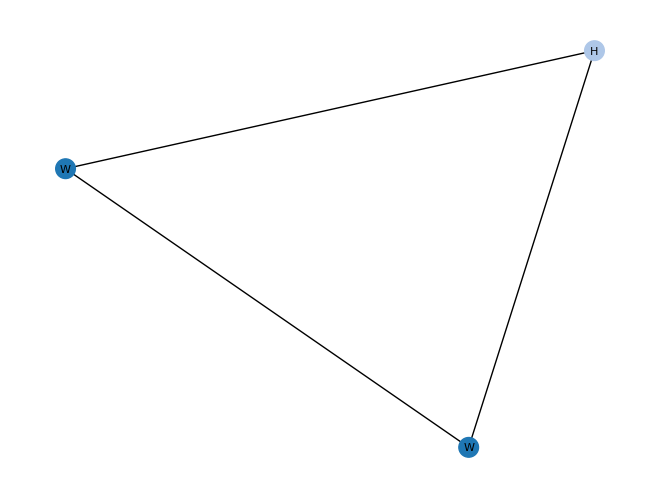

Number of nodes: 3
Number of edges: 4
Node features shape: torch.Size([3, 27])


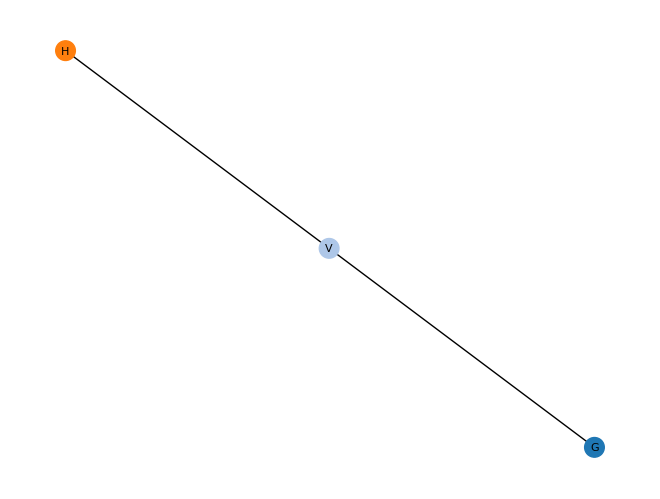

Number of nodes: 12
Number of edges: 32
Node features shape: torch.Size([12, 27])


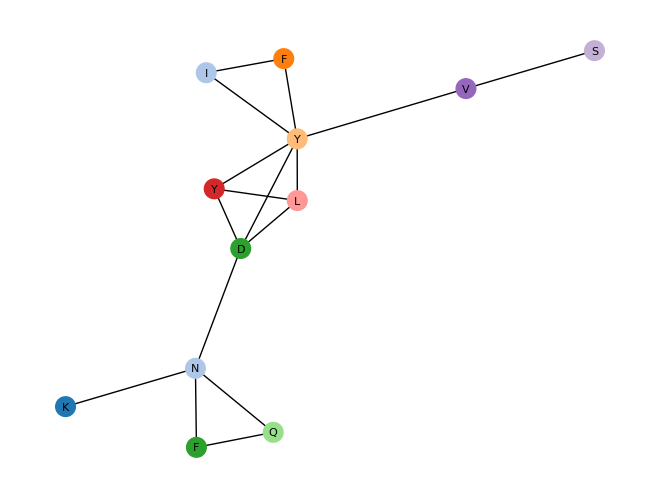

Number of nodes: 5
Number of edges: 14
Node features shape: torch.Size([5, 27])


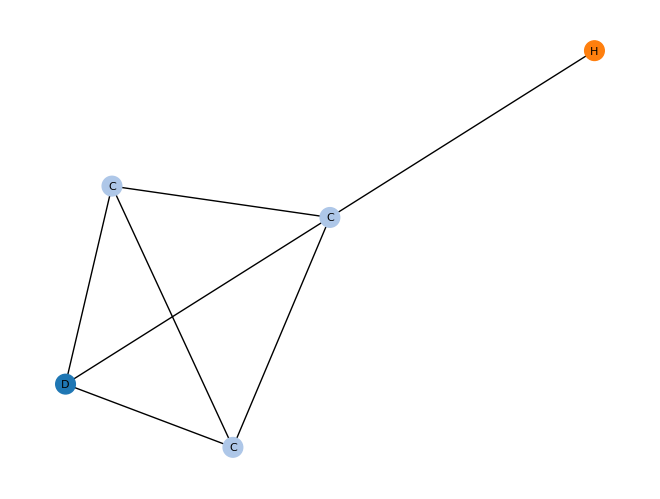

Number of nodes: 4
Number of edges: 8
Node features shape: torch.Size([4, 27])


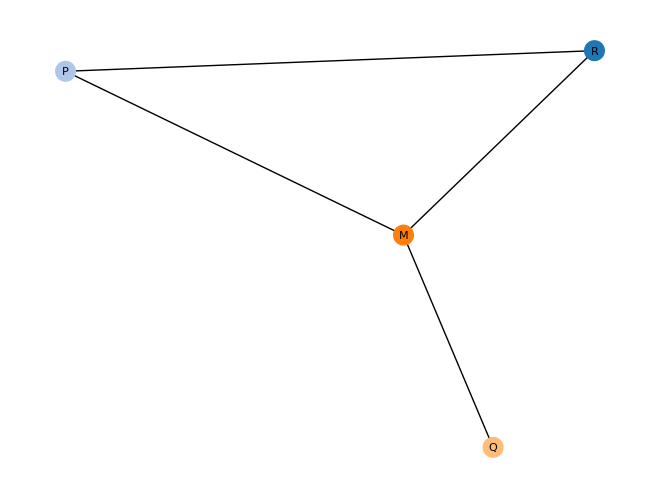

Number of nodes: 2
Number of edges: 2
Node features shape: torch.Size([2, 27])


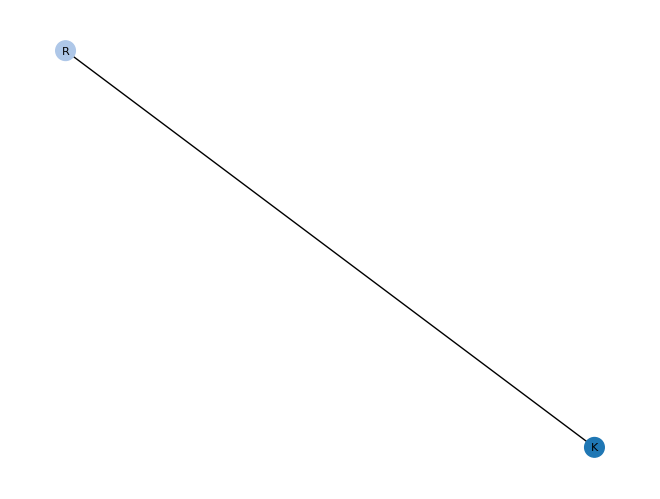

In [55]:
for i, graph in enumerate(pruned_graphs):
    graph_creator.print_graph_metrics(graph)
    draw_graph(graph, onehot_encoder)

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_protein_structure(graph, le, aa_info_dict):
    # Define color mapping for amino acids
    color_map = {
        'A': 'blue', 'C': 'cyan', 'D': 'purple', 'E': 'pink', 'F': 'orange',
        'G': 'green', 'H': 'red', 'I': 'yellow', 'K': 'violet', 'L': 'brown',
        'M': 'grey', 'N': 'lightblue', 'O': 'lightgreen', 'P': 'coral', 'Q': 'olive',
        'R': 'gold', 'S': 'navy', 'T': 'teal', 'U': 'maroon', 'V': 'lime',
        'W': 'magenta', 'Y': 'darkorange'
    }

    # Extract coordinates and additional info
    coords = graph.x[:, :3].numpy()  # Assuming the first three columns are X, Y, Z coordinates
    aa_indices = graph.x[:, 3].numpy()  # Assuming the fourth column is the encoded amino acid index
    masses = graph.x[:, 4].numpy()  # Assuming the fifth column is the mass

    # Decode amino acid indices to letters
    aa_letters = le.inverse_transform(aa_indices.astype(int))

    # Normalize masses for sphere sizes, increase scaling for larger spheres
    normalized_sizes = (masses - masses.min()) / (masses.max() - masses.min()) * 200 + 20

    # Plot in 3D
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot each C-alpha as a sphere
    for i, (x, y, z, aa, mass) in enumerate(zip(coords[:, 0], coords[:, 1], coords[:, 2], aa_letters, normalized_sizes)):
        ax.scatter(x, y, z, s=mass, c=color_map.get(aa, 'black'))

    # Add a legend with full amino acid names using dummy points
    for aa, color in color_map.items():
        full_name = aa_info_dict.get(aa, 'Unknown')
        ax.scatter([], [], [], color=color, label=full_name)  # Dummy points for legend

    # Customize plot appearance
    ax.set_title("3D Protein Structure with C-alpha Spheres")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.legend(title="Amino Acids", loc="upper left", bbox_to_anchor=(1, 1), markerscale=1.2)
    plt.show()

In [24]:
aa_info = pd.read_csv('aa_mass_letter.csv')
aa_info_dict = aa_info.set_index('Abbrev.').to_dict(orient='index')

plot_protein_structure(graph, le, aa_info_dict)

ValueError: y contains previously unseen labels: [-10  -8  -7  -6  -5  -4  -3  -2  -1]